# Laboratorio 02: 

### Intuición estadística modelos de *machine learning*

1. Generar dos distribuciones de probabilidad centradas en 5.0,  7.5 con desviación estandar de 2.5 y 1.5 respectivamente. Realizar un gráfico de ambas distribuciones de probabilidad. 

  a). Emplear el objeto [stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) y el metodo *Probability density function* (pdf)

  b) Realizar un gráfico de ambas distribuciones

2.  ¿Qué frontera analítica puede separar los datos?. Determine una expresión analítica en este caso. 


### Modelo de *machine learning*

3. Empleando el metodo *Random variates*(rvs), genere 100 muestas aleatorias para cada distribución, estos seran los datos de entrenamiento

4. Realice un gráfico en el que pueda superponer ambas distribuciones, estas 200 muestas serán las caracteristicas (*features*) de nuestro data frame, para cada característica tendremos una etiqueta(*labels*) correspondiente a  0 ó 1. 



5. Con los datos anteriores construya un DataFrame con los *features* y *labels* de la siguiente forma:


 |Y(*labels*)         | X_1(*feature*)       |
 |----------|----------|
 |$Y^{1}$ | $X_1^{1}$|
 |$Y^{2}$ | $X_1^{2}$|
 |.         | .        |
 |.         | .        |
 |.         | .        |
 |$Y^{m}$ | $X_1^{m}$  |

- Se sugiere emplear las claves Y, X para los labels y features respectivamente.
- $Y^{1},Y^{2}... Y^{m} $ son los  label de entrenamiento.
- $X_1^{1},X_1^{2}... X_1^{m} $ es el conjunto de datos de entrenamiento asociado a la característica 1 en el entrenamiento m. 
- Este dataframe será el dataset de entrenamiento, para los datos de test construiremos 50 variables aleatorias. 



6. Construye un segundo data frame con 50 datos de test, asociados a las   muestras de  las dos distribuciones, estos serán los datos de test empleados para validar los algoritmos de clasificación df_test con claves  Y, X_1.

### Modelo de machining learning 
7. Por ahora, emplearemos  clasificadores bajo un modelo de caja negra. La forma para implementar el modelo es la siguiente:
  - Definir el modelo y realizar el fit:
  ```
    clf = LinearRegression()
    clf.fit(X_train, Y_train)
  ```
  - Determinar el score de los datos de entrenamiento 
 
  ```
  score = clf.score(X_train, Y_train)
  ```
  - Determinar el score para los datos de test, ¿que puede concluir mirando los scores?

  Nota: 
  Emplear los siguientes clasificadores de machine learning y determinar los score para cada modelo. 
  
  ```
    - DecisionTreeClassifier(max_depth=3),
    - SVC(kernel="linear", C=0.025)
  ```

8. Existen librerias que pueden optmizar los hyperparametros de cualquier modelo:   [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) prueba a implementar las siguientes lineas de código con el siguiente modelo:

```
from sklearn.model_selection import GridSearchCV

  param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
  CV_rfc.fit(x_train, y_train)
```

9. En los algoritmos de *machining learning* es de suma importancia conocer las curvas de aprendizaje para decidir si el algoritmo funciona de manera optima, emplea las siguiente lineas de código para mostrar las curvas de aprendizaje de la regresion lineal. 

```
title = "Learning Curves (RandomForestRegressor)"
plot_learning_curve(
    regr, title, Xtr_, ytr_,  ylim=(0.8, 1.01),  n_jobs=4
)
```


10. Pruea a construir curvas de aprendizaje para los siguientes valores en las distribuciones(emplea una regresion lineal):
  - Datos de entrenamiento 30. media1=7.5, media2=10, desv1=1, desv1=1
  - Datos de entrenamiento 100. media1=7.5, media2=10, desv1=1, desv1=1
  - Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 2, desv1 = 2  
  - Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 0.5, desv1 = 0.5  
  -¿Qué puede concluir? de cada prueba.


Nota: Busca siempre la manera de construir tus codigos de forma estructurada  de tal forma que puedar variar parametros con facilidad.




In [17]:
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import norm


In [3]:
# 1. Construir dos distribuciones 
x = np.linspace(-5, 15,1000)
mean1 = 5
mean2=10
desv1 = 2.5
desv2=1.5
f1 = stats.norm(loc = mean1, scale = desv1)
f2=stats.norm(loc=mean2, scale=desv2)


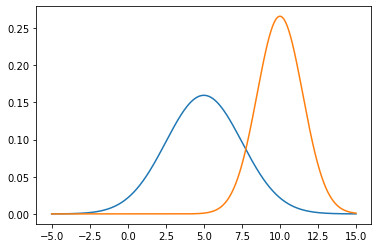

In [4]:
plt.plot(x,f1.pdf(x))
plt.plot(x,f2.pdf(x))


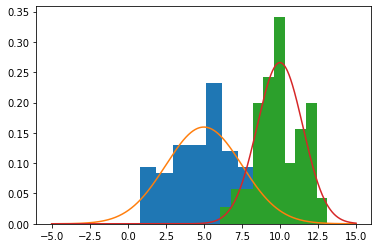

In [5]:
m=100
n=25
random_1 = f1.rvs(m)
random_2 = f2.rvs(m)
test_1=f1.rvs(n)
test_2=f2.rvs(n)

plt.figure()
plt.hist(random_1, density=True)
plt.plot(x, f1.pdf(x))
plt.hist(random_2, density=True)
plt.plot(x, f2.pdf(x))
plt.show()

In [6]:
X=np.zeros(2*m)
Y=np.zeros(2*m)

X_test=np.zeros(2*n)
Y_test=np.zeros(2*n)

X[0:m]=random_1
X[m:2*m]=random_2
X_test[0:n]=test_1
X_test[n:2*n]=test_2

Y[0:m]=np.zeros(m)
Y[m:2*m]=np.ones(m)
Y_test[0:n]=np.zeros(n)
Y_test[n:2*n]=np.ones(n)


In [7]:
data_muestra=np.array([X,Y]).T
data_test=np.array([X_test,Y_test]).T
columns_muestra=['X', 'Y']
columns_test=['X_test', 'Y_test']

df_muestra=pd.DataFrame(data=data_muestra, columns=columns_muestra)
df_test=pd.DataFrame(data=data_test, columns=columns_test)

In [8]:
clf=LinearRegression()
clf.fit(X.reshape(2*m,1), Y.reshape(2*m,1))
score = clf.score(X.reshape(2*m,1), Y.reshape(2*m,1))
print(score)

0.6302796883139946


In [9]:
clf_test=LinearRegression()
clf_test.fit(X_test.reshape(2*n,1), Y_test.reshape(2*n,1))
score_test = clf_test.score(X_test.reshape(2*n,1), Y_test.reshape(2*n,1))
print(score_test)

0.6051902780448049


In [10]:
Treeclf=DecisionTreeClassifier(max_depth=3)
Treeclf.fit(X.reshape(2*m,1), Y.reshape(2*m,1))
scoreTree= Treeclf.score(X.reshape(2*m,1), Y.reshape(2*m,1))
print(scoreTree)

0.94


In [11]:
Treeclf_test=DecisionTreeClassifier(max_depth=3)
Treeclf_test.fit(X_test.reshape(2*n,1), Y_test.reshape(2*n,1))
scoreTree_test= Treeclf_test.score(X_test.reshape(2*n,1), Y_test.reshape(2*n,1))
print(scoreTree_test)

0.96


In [12]:
svcclf=SVC(kernel="linear", C=0.025)
svcclf.fit(X.reshape(2*m,1), Y.reshape(2*m,1))
scoresvc= svcclf.score(X.reshape(2*m,1), Y.reshape(2*m,1))
print(scoresvc)

0.91


/home/samuel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [13]:
svcclf_test=SVC(kernel="linear", C=0.025)
svcclf_test.fit(X_test.reshape(2*n,1), Y_test.reshape(2*n,1))
scoresvc_test= svcclf_test.score(X_test.reshape(2*n,1), Y_test.reshape(2*n,1))
print(scoresvc_test)

0.92


/home/samuel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [14]:
param_grid = { 
'n_estimators': [200, 500],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X.reshape(2*m,1),Y.reshape(2*m,))

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [16]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pylab' from '/home/samuel/.local/lib/python3.8/site-packages/matplotlib/pylab.py'>

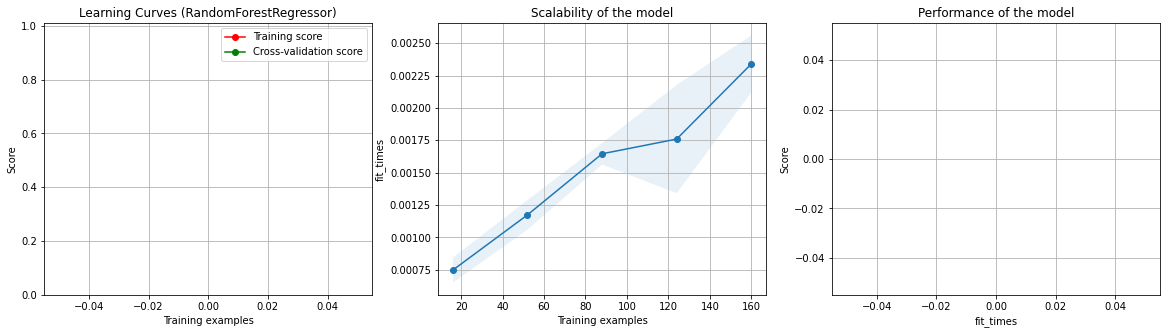

In [24]:
title = "Learning Curves (RandomForestRegressor)"
plot_learning_curve(
   LinearRegression(), title, X, Y,  ylim=(0, 1.01),  n_jobs=4
)

